# Coursework 1 - Tutorial (25 October 2019)
Notebook prepared by your tutor Michał Robert Hoffman - M.R.Hoffman@soton.ac.uk

Feel free to modify as required.

## Overview

In this coursework, we use Python to import fishing data and analyse it.
Please read the coursework specification (CW1) for further instructions.

This tutorial will cover the most important elements you need to report on, but not all! Always refer to your lecture notes if you're not sure what to cover.

### Important notes:

You are required to submit a properly formatted report. Jupyter notebook submissions will not be accepted! Also the graphics we generate below are very basic. You will be required to make them look more professional, by manipulating the size of the graphics, and finding optimal graphing parameters, such as bin sizes etc. You may not reuse your friends image files, as that may constitute a breach of academic integrity. Also, all your write-ups in the final report must be your own original work.

Please also note that some outputs have been pre-populated from you. When you change your code cells and run them, the outputs may change slightly, which is expected! If your new output looks very different to the previous outputs, that could be a problem.

## Importing the libraries

In this case we are going to use the library pandas. 
You can find the documentation of the library [here](https://pandas.pydata.org/). 
This library is one of the most important libraries to analyse data in Python. 
It is connected with Numpy and Matplotlib libraries. Check more about these libraries [here]
(http://www.numpy.org/) and [here](https://matplotlib.org/).

Fill in the blanks in the imports below:

In [26]:
# Import the libraries pandas, and matplotlib
# for matplotlib just load pyplot
import pandas as pd
import matplotlib.pyplot as plt #This is to format your plots and do things like plt.figure(figsize=(20,10))


Everytime you change the code, remember to press "Run" or press Ctrl+Enter (or Shift+Enter) to rerun your code.

In the next section, we fill in the filename (file is specified in your coursework spec, download it first and place in a directory that can be accessed by your Jupyter Notebook) and read in the data.

## Reading the file into a dataframe.

(NB. Do you know what a dataframe is? Can you explain it using simple English?)

For more information on dataframes, google "what are pandas dataframes?".

You'll need to pass some paramateres to the pandas library, so that it knows the following:
the filename,
the separator (what character separates the data points in each row in the file?)
is there a header in the file (if not, say None)
is there a special column in the file that's used to index that file?

In [27]:
filename = "fish1.txt"

time_weight_bait_data = pd.read_csv(filename,sep= " ",header=None ,index_col=None)

Find a way of finding the "shape" of the data. You can google this if necessary.
Shape is a tuple that gives you the number of columns followed by the number of rows.
Is shape a method or an attribute? What does it mean? What's the difference?


In [28]:
time_weight_bait_data.shape

(400, 3)

In [29]:
#Give human-readable names to the columns
#Setting the column names
time_weight_bait_data.columns=["time","weight","bait"]


In [30]:
#Display only the top rows
time_weight_bait_data.head()

,time,weight,bait
0,15.25,2.40,B
1,7.43,1.66,C
2,7.17,2.75,C
3,2.93,1.21,A
4,11.07,0.39,C


In [31]:
#Now, you will display a sample of 10 random rows
time_weight_bait_data.sample(10)
time_weight_bait_data.count()

time      400
weight    400
bait      400
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17d2f160>,
      dtype=object)

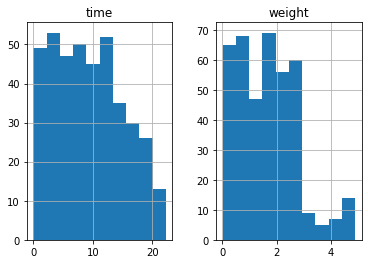

In [32]:
# Now, generate histograms for each column using the DataFrame's built-in function
# N.B. there are many ways to do this
# First, type a dot "." after the objects name
# Next press the Tab key 
# Type "h" and you will see the methods starting with that letter
# Remember to add the brackets () at the end for a function call!

time_weight_bait_data.hist()
#plt.hist(time_weight_bait_data['time'])
#plt.hist(time_weight_bait_data['weight'])


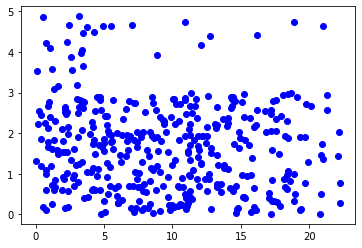

In [94]:
plt.plot(time_weight_bait_data['time'], time_weight_bait_data['weight'], 'bo')

In [95]:
#Now specify the column size Weight (if you named it that!), hide the grid, and set bins to 50
#Then rerun the histogram

In [96]:
#If you run the "describe" function, it will show you LOTS of useful stats for both colunmns
time_weight_bait_data.describe()

,time,weight
count,400.000000,400.00000
mean,9.370525,1.66740
std,5.796400,1.10816
min,0.010000,0.01000
25%,4.325000,0.70750
50%,9.020000,1.61500
75%,13.747500,2.40000
max,22.270000,4.88000


In [97]:
#Additionally calculate the skewness and kurtosis for each column

#You can use your dataframe's built-in methods for that:

time_weight_bait_data.skew()

time      0.266856
weight    0.653793
dtype: float64

In [98]:
time_weight_bait_data.kurtosis()

time     -0.946594
weight    0.161891
dtype: float64

In [99]:
#Finally, find the smallest and biggest data values:

time_weight_bait_data.min()


time      0.01
weight    0.01
bait         A
dtype: object

In [100]:
#for get for particular colummn
time_weight_bait_data["weight"].max()
time_weight_bait_data["weight"].min()

#Important Operations:

# Select all ROWS and few columns from the DaTA Frame
time_weight_bait_data[[ "time", "weight"]]
#Row filtering
time_weight_bait_data.iloc[0:3]
#Row filtering based on condition
#Column selection based on condition

,time,weight,bait
0,15.25,2.40,B
1,7.43,1.66,C
2,7.17,2.75,C


# Seaborn Visualisations
We will be using Seaborn for more complex visualisations
Fun fact: did you know that Seaborn is imported as SNS because it's a character in the West Wing series (Samuel Norman Seaborn). Don't ask me...

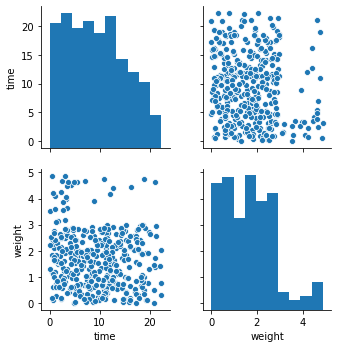

In [185]:
import seaborn as sns # For visualisations

#Run the pairplot function from seaborn on your data frame
sns.pairplot(time_weight_bait_data[:])

plt.savefig('/Users/hyadaval/Desktop/DataScience/DataScience/CW1/pairPlot.jpg')


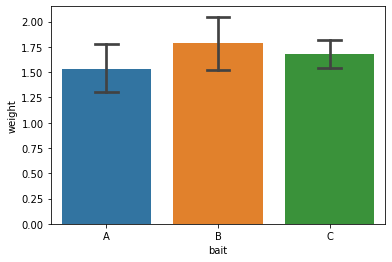

In [102]:
#B is most effective bait, because it has got maximum weight it can catch with confidence levels.
sns.barplot(x="bait", y="weight", data=time_weight_bait_data, ci=95, order=["A", "B","C"],capsize=.2)

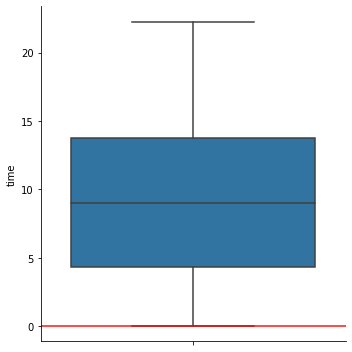

In [175]:
chart1= sns.catplot(y="time", kind="box",data=time_weight_bait_data, ci=5);
chart1.axes[0][0].axhline(y =0, color='red', linewidth=2, alpha=.7)

sns.barplot( y="weight", data=time_weight_bait_data, ci=95, order=["A", "B","C"],capsize=.2)

TypeError: boxplot() got an unexpected keyword argument 'ci'

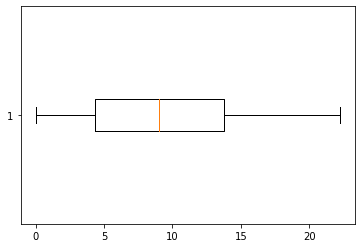

In [159]:
plt.boxplot(time_weight_bait_data["time"] ,0, 'rs',0)


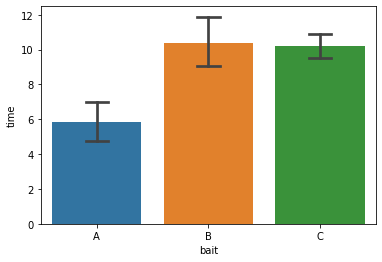

In [179]:
#bar plot shows only the mean (or other estimator) value
#B is most effective bait, because it has got maximum mean weight it can catch with confidence levels.
sns.barplot(x="bait", y="time", data=time_weight_bait_data, ci=95, order=["A", "B","C"],capsize=.2)
plt.savefig('/Users/hyadaval/Desktop/DataScience/DataScience/CW1/baitEff.jpg')


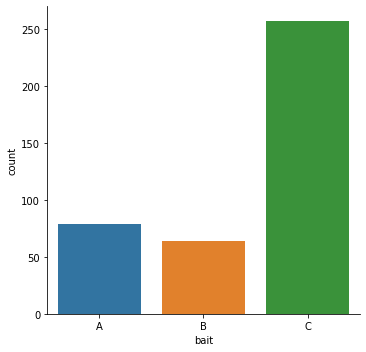

In [178]:
sns.catplot(x="bait", kind="count",data=time_weight_bait_data,  order=["A", "B","C"],ci=95);
plt.savefig('/Users/hyadaval/Desktop/DataScience/DataScience/CW1/baitCount.jpg')

sns.catplot(x="bait", y="time", kind="box",data=time_weight_bait_data,  order=["A", "B","C"],ci=95);
plt.savefig('/Users/hyadaval/Desktop/DataScience/DataScience/CW1/baitWeight.jpg')



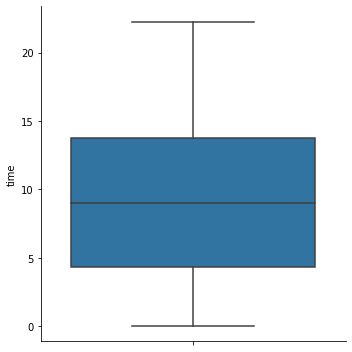

In [165]:
sns.catplot( y="time", kind="box",data=time_weight_bait_data,ci=95);

In [106]:
import statsmodels.stats.api as sms

sms.DescrStatsW(time_weight_bait_data["weight"]).tconfint_mean()

(1.5584719359190635, 1.7763280640809365)

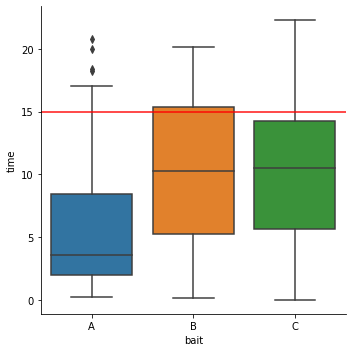

In [108]:
chart=sns.catplot(x="bait", y="time", kind="box",data=time_weight_bait_data, ci=95, order=["A", "B","C"]);
chart.axes[0][0].axhline(y = 15, color='red', linewidth=2, alpha=.7)
plt.savefig('/Users/hyadaval/Desktop/DataScience/DataScience/CW1/bait3.jpg')

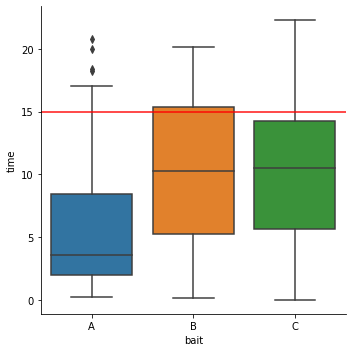

In [184]:
chart= sns.catplot(x="bait", y="time", kind="box",data=time_weight_bait_data, order=["A", "B","C"]);

chart.axes[0][0].axhline(y = 15, color='red', linewidth=2, alpha=.7)
plt.savefig('/Users/hyadaval/Desktop/DataScience/DataScience/CW1/bait3.jpg')

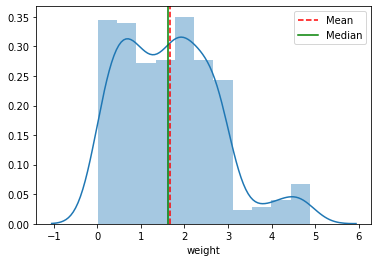

In [110]:
 from scipy import stats
(mu1, sigma1) = stats.norm.fit(time_weight_bait_data["weight"])

mean=time_weight_bait_data["weight"].mean()
median=time_weight_bait_data["weight"].median()





c2=sns.distplot(time_weight_bait_data["weight"])
c2.axvline(mean, color='r', linestyle='--')
c2.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

#plt.legend(["dist($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu1, sigma1)])
plt.savefig('/Users/hyadaval/Desktop/DataScience/DataScience/CW1/weightDist.jpg')

22


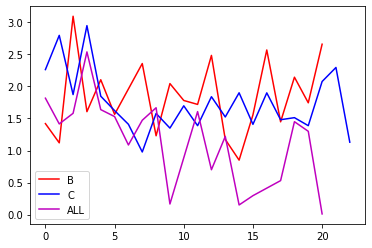

In [187]:
# average weight of the hour.
x= time_weight_bait_data["weight"]
y=time_weight_bait_data["time"]
y_int=time_weight_bait_data["time"].astype(int)
print(max(y_int) -min(y_int))
#for i in range(max(y_int) -min(y_int)):
temp1 =time_weight_bait_data[time_weight_bait_data["bait"] =='A'].groupby(time_weight_bait_data["time"].astype(int))["weight"].mean()
temp2 =time_weight_bait_data[time_weight_bait_data["bait"] =='B'].groupby(time_weight_bait_data["time"].astype(int))["weight"].mean()
temp3 =time_weight_bait_data[time_weight_bait_data["bait"] =='C'].groupby(time_weight_bait_data["time"].astype(int))["weight"].mean()
temp1.columns=["time","weight"]
temp2.columns=["time","weight"]
temp3.columns=["time","weight"]
temp =time_weight_bait_data.groupby(time_weight_bait_data["time"].astype(int))["weight"].mean()
#sns.lineplot(data=temp, color='g',  label="A")
sns.lineplot(data=temp2, color='r',  label="B")
sns.lineplot(data=temp3, color='b',  label="C")
sns.lineplot(data=temp1, color='m',  label="ALL")
ax.set(xlabel='time in hours', ylabel='mean weight')
ax.axvline(x=15, color='m', linewidth=2, alpha=.7)

plt.savefig('/Users/hyadaval/Desktop/DataScience/DataScience/CW1/bait4.jpg')
#sns.lineplot(temp[:,0], temp[:,1], err_style=None)
# round of to int

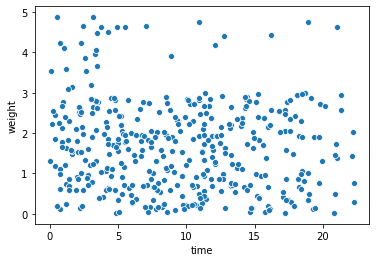

In [112]:
# Run the scatterplot of Weight vs. Time on your dataframe
#Here x ,y are names of the columns in the DataFrame
sns.scatterplot(x="time", y="weight", data=time_weight_bait_data)

#One of the graph i.e scatter plot, We can also write like below 
#sns.scatterplot(x=time_weight_bait_data["time"],y=time_weight_bait_data["weight"])


In [113]:
stats.norm.fit(time_weight_bait_data["weight"])

#for time: skewness can 

(1.6674, 1.1067735721456309)

Mean 9.370524999999999
median 9.02
mu 9.370525
sigma 5.789150410412136
cal 3.5813745895878633


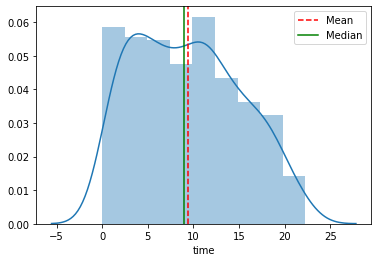

In [114]:
#Now generate smooth curves for the distributions of both variables


mean=time_weight_bait_data["time"].mean()
median=time_weight_bait_data["time"].median()
print("Mean", mean)
print("median", median)

(mu, sigma) = stats.norm.fit(time_weight_bait_data["time"])
print("mu", mu)
print("sigma", sigma)
cal= mean - sigma
print("cal", cal)

c1= sns.distplot(time_weight_bait_data["time"])
c1.axvline(mean, color='r', linestyle='--')
c1.axvline(median, color='g', linestyle='-')
#c1.axvline(cal, color='m', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

plt.savefig('/Users/hyadaval/Desktop/DataScience/DataScience/CW1/timeDist.jpg')

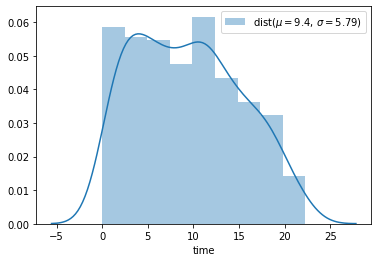

In [115]:


(mu, sigma) = stats.norm.fit(time_weight_bait_data["time"])


c1= sns.distplot(time_weight_bait_data["time"])
plt.legend(["dist($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
plt.savefig('/Users/hyadaval/Desktop/DataScience/timeDist.jpg')

In [116]:
#Create a new markdown cell below and write a summary of your findings from the plots above
#Use headings of different sizes

# Digging deeper into the correlation

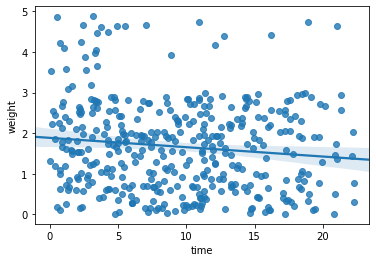

In [117]:
# Create a regplot to figure out the correlation

sns.regplot(x="time", y="weight", data=time_weight_bait_data, ci=95)

In [118]:
#Import stats from scipy

from scipy import stats


In [119]:
# Use the pearsonr method to find the correlation details 
# Is it positive or negative?
# Is it statistically significant?
#Here first one is "r" and the one argument is "p value".
#Read more about these in statistics
# p value represents the significance of the correlation. if it is < 0.05, then it is significant. If it is very less then it's more significant.
# But the correlation r is less, almost flat which means the dependency of weight on time is very less impact.
stats.pearsonr(time_weight_bait_data["time"],time_weight_bait_data["weight"])

(-0.1205929886399013, 0.015816415118020677)

In [155]:
# Define a named function that calculates the R-squared using what we did in the previous step

def r2(x,y):
    return stats.pearsonr(x,y)[0]**2
print(r2(time_weight_bait_data["time"],time_weight_bait_data["weight"]))
plt.savefig('/Users/hyadaval/Desktop/DataScience/DataScience/CW1/correaltionX&Y.jpg')

0.014542668909103364


<Figure size 432x288 with 0 Axes>

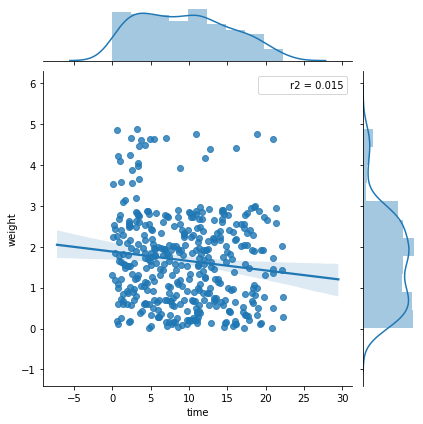

In [156]:
## You can experiment with some other functions like jointplot

sns.jointplot(x="time", y="weight", data=time_weight_bait_data, kind="reg", stat_func=r2)

plt.savefig('/Users/hyadaval/Desktop/DataScience/DataScience/CW1/correaltionX&Y.jpg')

In [ ]:
#Create a new markdown cell below and write a summary of your findings from the plots above
#Use headings of different sizes

## [This is the end of your tutorial.]
For CW1, we will cover a few more concepts next week.

If you finished this early, have a look at the sklearn and numpy docs and examples online.